# [NetworkX](http://networkx.github.io/)

## APPENDIX A. TUTORIAL
### A.1 Creating a graph

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

### A.2 Nodes

In [3]:
# You can add one node at a time:
G.add_node(1)

In [4]:
# add a list of nodes,
G.add_nodes_from([2, 3])

In [5]:
"""or add any iterable container of nodes. You can also add nodes along with node attributes if your container yields
2-tuples (node, node_attribute_dict). Node attributes are discussed further below."""
H = nx.path_graph(10)
G.add_nodes_from(H)

In [6]:
# Note that G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.
G.add_node(H)

In [7]:
# The graph G now contains H as a node.
G.nodes

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x000002B2009691F0>))

### A.3 Edges

In [8]:
# G can also be grown by adding one edge at a time
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple*

In [9]:
G.number_of_edges()

2

In [10]:
# by adding a list of edges,
G.add_edges_from([(1, 2), (1, 3)])

In [11]:
"""or by adding any ebunch of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a
2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., (2, 3, {'weight':
3.1415})"""
G.add_edges_from(H.edges)

In [12]:
G.number_of_edges()

10

In [13]:
# There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges
G.clear()

In [14]:
# we add new nodes/edges and NetworkX quietly ignores any that are already present.
G.add_edges_from([(1, 2), (1, 3)])
print(f"G.number_of_nodes(): {G.number_of_nodes()}")
print(f"G.number_of_edges(): {G.number_of_edges()}")

G.number_of_nodes(): 3
G.number_of_edges(): 2


In [15]:
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam") # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [16]:
# At this stage the graph G consists of 8 nodes and 3 edges, as can be seen by:
print(f"G.number_of_nodes(): {G.number_of_nodes()}")
print(f"G.number_of_edges(): {G.number_of_edges()}")

G.number_of_nodes(): 8
G.number_of_edges(): 3


In [17]:
"""We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj
and G.degree. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a
graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you
can look up node and edge data attributes via the views and iterate with data attributes using methods .items(),
.data('span'). If you want a specific container type instead of a view, you can specify one. Here we use lists,
though sets, dicts, tuples and other containers may be better in other contexts."""
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [18]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [19]:
list(G.adj[1]) # or list(G.neighbors(1))

[2, 3]

In [20]:
list(G.neighbors(3))

[1, 'm']

In [21]:
G.degree[1] # the number of edges incident to 1

2

In [22]:
G.degree[2]

1

In [23]:
"""One can specify to report the edges and degree from a subset of all nodes using an nbunch. An nbunch is any of: None
(meaning all nodes), a node, or an iterable container of nodes that is not itself a node in the graph."""
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [24]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

In [25]:
"""One can remove nodes and edges from the graph in a similar fashion to adding. Use methods Graph.remove_node(),
Graph.remove_nodes_from(), Graph.remove_edge() and Graph.remove_edges_from(), e.g."""
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [26]:
G.remove_edge(1, 3)
G.edges()

EdgeView([])

In [27]:
# When creating a graph structure by instantiating one of the graph classes you can specify data in several formats.
G.add_edge(1, 2)
H = nx.DiGraph(G) # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [28]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

### A.4 What to use as nodes and edges
You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful
items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object
(except None), and an edge can be associated with any object x using G.add_edge(n1, n2, object=x).

As an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML
record of publications detailing experimental observations of their interaction.

We have found this power quite useful, but its abuse can lead to unexpected surprises unless one is familiar with Python. If in doubt, consider using **convert_node_labels_to_integers()** to obtain a more traditional graph with integer labels.

In [29]:
G.clear()
G.add_edges_from([("foo","bar"),("foo", "baz")])
G.nodes

NodeView(('foo', 'bar', 'baz'))

In [30]:
nx.relabel.convert_node_labels_to_integers(G).nodes

NodeView((0, 1, 2))

### A.5 Accessing edges and neighbors
In addition to the views Graph.edges(), and Graph.adj(), access to edges and neighbors is possible using subscript notation.

In [31]:
G.clear()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam") # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
G.remove_node(2)
G.remove_nodes_from("spam")
G.remove_edge(1, 3)
G.add_edge(1, 2)
H = nx.DiGraph(G) # create a DiGraph using the connections from G
print(f"G.nodes: {G.nodes}")
print(f"G.edges: {G.edges}")

G.nodes: [1, 3, 'spam', 2]
G.edges: [(1, 2)]


In [32]:
G[1] # same as G.adj[1]

AtlasView({2: {}})

In [33]:
G[1][2]

{}

In [34]:
 G.edges[1, 2]

{}

In [35]:
# You can get/set the attributes of an edge using subscript notation if the edge already exists
G.add_edge(1, 3)
print(f"G.edges: {G.edges}")

G.edges: [(1, 2), (1, 3)]


In [36]:
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
print(f"G.edges: {G.edges}")

G.edges: [(1, 2), (1, 3)]


In [37]:
G.edges[1, 2]

{'color': 'red'}

In [38]:
"""Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items().
Note that for undirected graphs, adjacency iteration sees each edge twice."""
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [39]:
# Convenient access to all edges is achieved with the edges property
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


### A.6 Adding attributes to graphs, nodes, and edges
Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or
edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be
hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct
manipulation of the attribute dictionaries named G.graph, G.nodes, and G.edges for a graph G.

#### A.6.1 Graph attributes

Assign graph attributes when creating a new graph

In [40]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [41]:
# Or you can modify attributes later
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

#### A.6.2 Node attributes
Add node attributes using *add_node*(), *add_nodes_from*(), or G.*nodes*

In [42]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [43]:
"""Note that adding a node to G.nodes does not add it to the graph, use G.add_node() to add new nodes. Similarly
for edges."""
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

#### A.6.3 Edge Attributes
Add/change edge attributes using add_edge(), add_edges_from(), or subscript notation. The special attribute weight should be numeric as it is used by algorithms requiring weighted edges.

In [44]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

### A.7 Directed graphs
The **DiGraph** class provides additional properties specific to directed edges, e.g., **DiGraph**.*out_edges*(),
**DiGraph**.*in_degree*(), **DiGraph**.*predecessors*(), **DiGraph**.*successors*() etc. To allow algorithms to work with both classes easily, the directed versions of *neighbors*() is equivalent to *successors*()
while degree reports the sum of *in_degree* and *out_degree* even though that may feel inconsistent at times.

In [45]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [46]:
 DG.degree(1, weight='weight')

1.25

In [47]:
list(DG.successors(1))

[2]

In [48]:
list(DG.neighbors(1))

[2]

In [49]:
list(DG.predecessors(1))

[3]

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency
to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for
some measurement you should probably convert it using **Graph**.*to_undirected*() or with

In [50]:
H = nx.Graph(G) # convert G to undirected graph

### A.8 Multigraphs

**NetworkX** provides classes for graphs which allow multiple edges between any pair of nodes. The **MultiGraph** and **MultiDiGraph** classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., **MultiGraph**.*degree*() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [51]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [52]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

In [53]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

### A.9 Graph generators and graph operations
In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by
1. Applying classic graph operations, such as:
    
    * subgraph(G, nbunch) - induced subgraph view of G on nodes in nbunch
    * union(G1,G2) - graph union
    * disjoint_union(G1,G2) - graph union assuming all nodes are different
    * cartesian_product(G1,G2) - return Cartesian product graph
    * compose(G1,G2) - combine graphs identifying nodes common to both
    * complement(G) - graph complement
    * create_empty_copy(G) - return an empty copy of the same graph class
    * to_undirected(G) - return an undirected representation of G
    * to_directed(G) - return a directed representation of G

2. Using a call to one of the classic small graphs, e.g.,

In [54]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

3. Using a (constructive) generator for a classic graph, e.g.,

In [55]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

4. Using a stochastic graph generator, e.g.,

In [56]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

5. Reading a graph stored in a file using common graph formats, such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

    * nx.write_gml(red, "path.to.file")
    * mygraph = nx.read_gml("path.to.file")

### A.10 Analyzing graphs

The structure of G can be analyzed using various graph-theoretic functions such as:

In [57]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam") # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [58]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [59]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

Some functions with large output iterate over (node, value) 2-tuples. These are easily stored in a dict structure if you desire.

In [60]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

In [61]:
sp

{1: {1: [1], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]},
 'spam': {'spam': ['spam']}}

### A.11 Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use
the open source Graphviz software package are included. These are part of the networkx.drawing module and
will be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [62]:
import matplotlib.pyplot as plt

You may find it useful to interactively test code using *ipython -pylab*, which combines the power of *ipython* and *matplotlib* and provides a convenient interactive mode.
To test if the import of *networkx.drawing* was successful draw *G* using one of

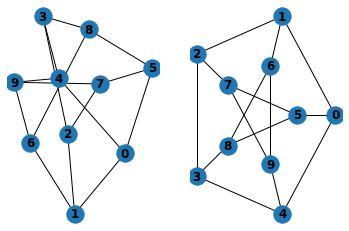

In [63]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

when drawing to an interactive display. Note that you may need to issue a Matplotlib
    
    plt.show()

command if you are not using matplotlib in interactive mode (see Matplotlib FAQ ).

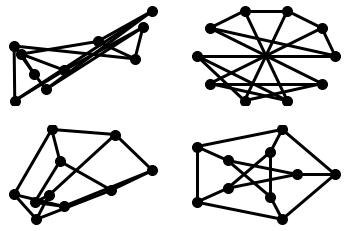

In [64]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via *draw_networkx*() and layouts via *layout*. You can use multiple shells with *draw_shell*().

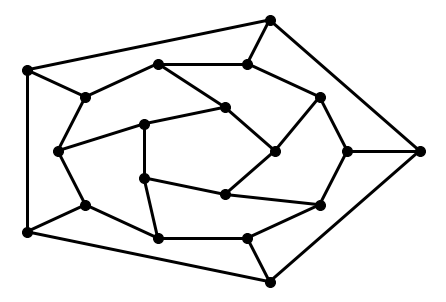

In [65]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

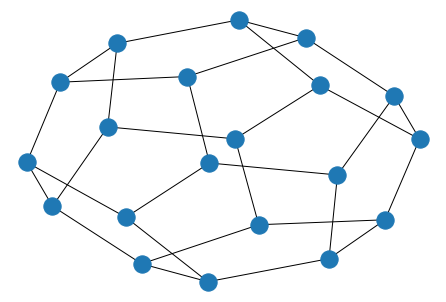

In [66]:
nx.draw(G)
plt.savefig("path.png")

writes to the file *path.png* in the local directory. If **Graphviz** and **PyGraphviz** or pydot, are available on your system, you can also use *nx_agraph.graphviz_layout*(*G*) or *nx_pydot.graphviz_layout*(*G*) to get the node positions, or write the graph in dot format for further processing.

    from networkx.drawing.nx_pydot import write_dot
    pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw(G, pos=pos)
    write_dot(G, 'file.dot')